## Segmentations Data Analysis

The first analysis is to correctly relate the dicom files with the segmentation files, in order to know the matched patients that have available segmentations from their respective imaging studies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
metadata_path = "/kaggle/input/rsna-2023-abdominal-trauma-detection/train_series_meta.csv"

train_metadata = pd.read_csv(metadata_path)
train_metadata.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [3]:
segmentations_path = "/kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations"

segmentations = os.listdir(segmentations_path)
segmentations = [int(os.path.splitext(segmentation)[0]) for segmentation in segmentations]
len(segmentations)

206

In [4]:
series = train_metadata["series_id"].tolist()

In [5]:
matched_series = []

for segmentation in segmentations:
    if segmentation in series:
        matched_series.append(segmentation)
    else:
        pass 

In [6]:
len(matched_series)

206

In [33]:
patients_segment = train_metadata[train_metadata["series_id"].isin(matched_series)].reset_index(drop=True)
patients_segment

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10217,16066,208.00,0
3,10228,30522,145.00,0
4,10228,40471,291.00,0
...,...,...,...,...
201,65504,55928,144.00,0
202,7642,778,183.00,0
203,8848,41663,238.00,0
204,8848,7384,367.00,0


In [24]:
patients_with_segmentations = patients_segment["patient_id"].unique()
patients_with_segmentations

array([10004, 10217, 10228, 10300, 10917, 10937, 11177, 11652, 13623,
       13741, 13794, 14309, 14321, 14343, 14950, 15117,  1523, 15876,
       16140, 16327, 16436, 16494, 16645, 16682, 17265, 18682, 18697,
       18877, 19249, 19410, 20621, 20951, 21141, 21411, 22623, 22755,
       24439, 24524, 25093, 25102, 25347, 28095, 28569, 28925, 28976,
       29565, 30446, 31636, 32272, 32425, 33007, 33251, 33848, 34409,
       35056,  3506, 35653, 36022, 36105, 36289, 37169, 37429, 37436,
       37459, 37551, 37802, 38045, 38238, 38427, 38541, 38982, 39330,
        3983,  4093, 41306, 41360, 42008, 42436, 43399, 43492, 43551,
       44136, 44507, 44693, 45488, 46904, 47065, 47263,  4791, 48710,
       50486, 50518, 50753, 50820, 50873, 51520, 51545, 52416, 53108,
       53294, 54183, 54361, 54722, 54832, 55567, 55710, 55888, 56050,
       57444, 57563, 58729, 60058, 60744, 60836, 61547, 62116, 62360,
       62397, 62763, 62845, 64194, 64256, 65326, 65456, 65504,  7642,
        8848,  9813]

## Reading the DICOM and NIFTII files

In [9]:
import numpy as np 
import pandas as pd 
import pydicom 
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sn
import os
from glob import glob

In [11]:
PATH = '/kaggle/input/rsna-2023-abdominal-trauma-detection'

train = pd.read_csv(f'{PATH}/train.csv')
train_series_meta = pd.read_csv(f'{PATH}/train_series_meta.csv')
df = pd.merge(train_series_meta, train, how='inner', on='patient_id')
df

,patient_id,series_id,aortic_hu,incomplete_organ,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,21057,146.00,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10004,51033,454.75,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
2,10005,18667,187.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10007,47578,329.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10026,29700,327.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,9961,2003,381.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4707,9961,63032,143.75,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4708,9980,40214,103.00,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1
4709,9980,40466,135.00,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1


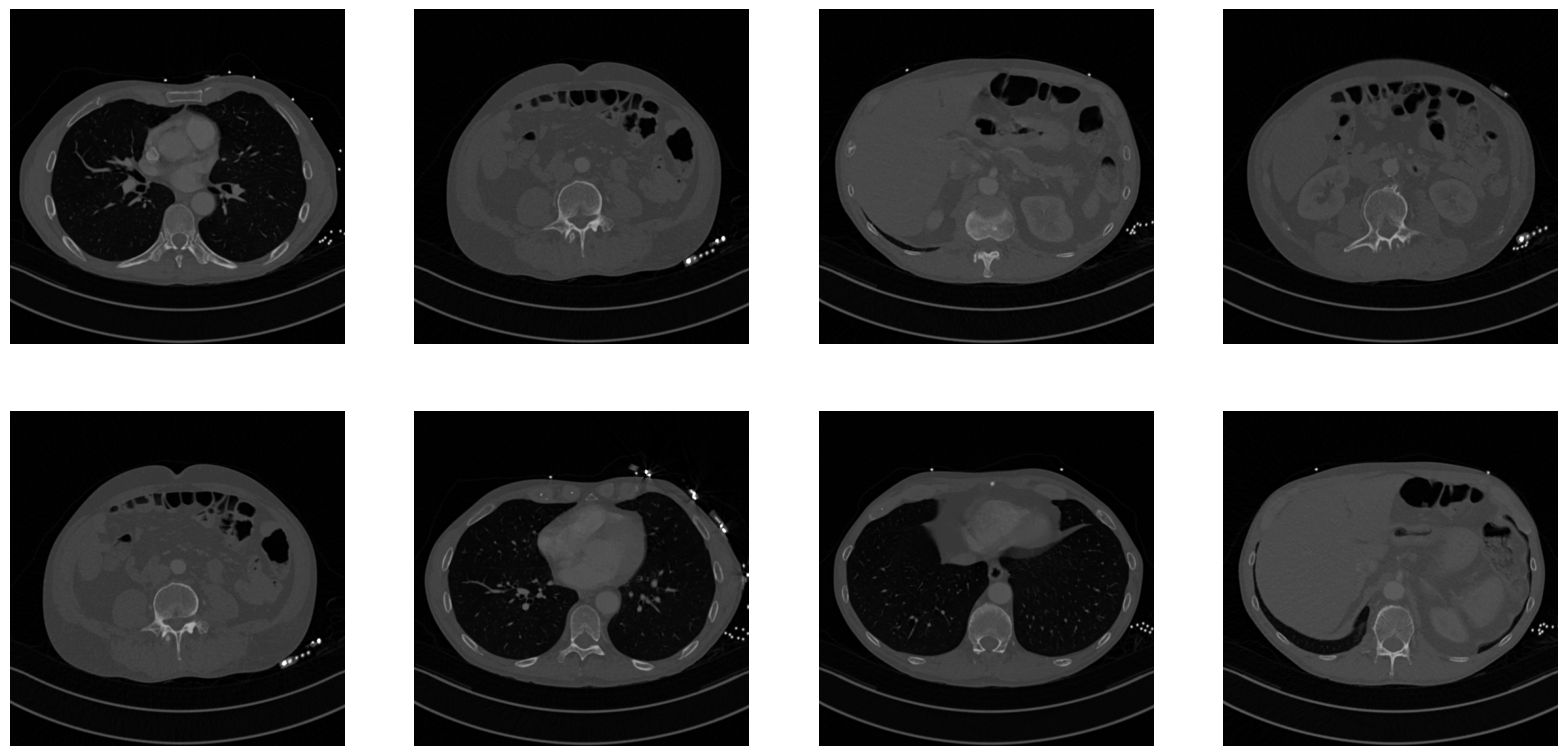

In [12]:

def visualize_dicom_images(patient_id, series_id, idx=0):
    patient_id = patient_id[idx]
    series_id = series_id[idx]
    
    image_file = glob(f"/kaggle/input/rsna-2023-abdominal-trauma-detection/train_images/{patient_id}/{series_id}/*.dcm")
    plt.figure(figsize=(20, 20))

    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        image_path = image_file[i]
        ds = pydicom.dcmread(image_path)
    
        plt.axis('off')
        plt.imshow(ds.pixel_array,cmap='gray')

    
visualize_dicom_images(df["patient_id"], df["series_id"], idx=24)

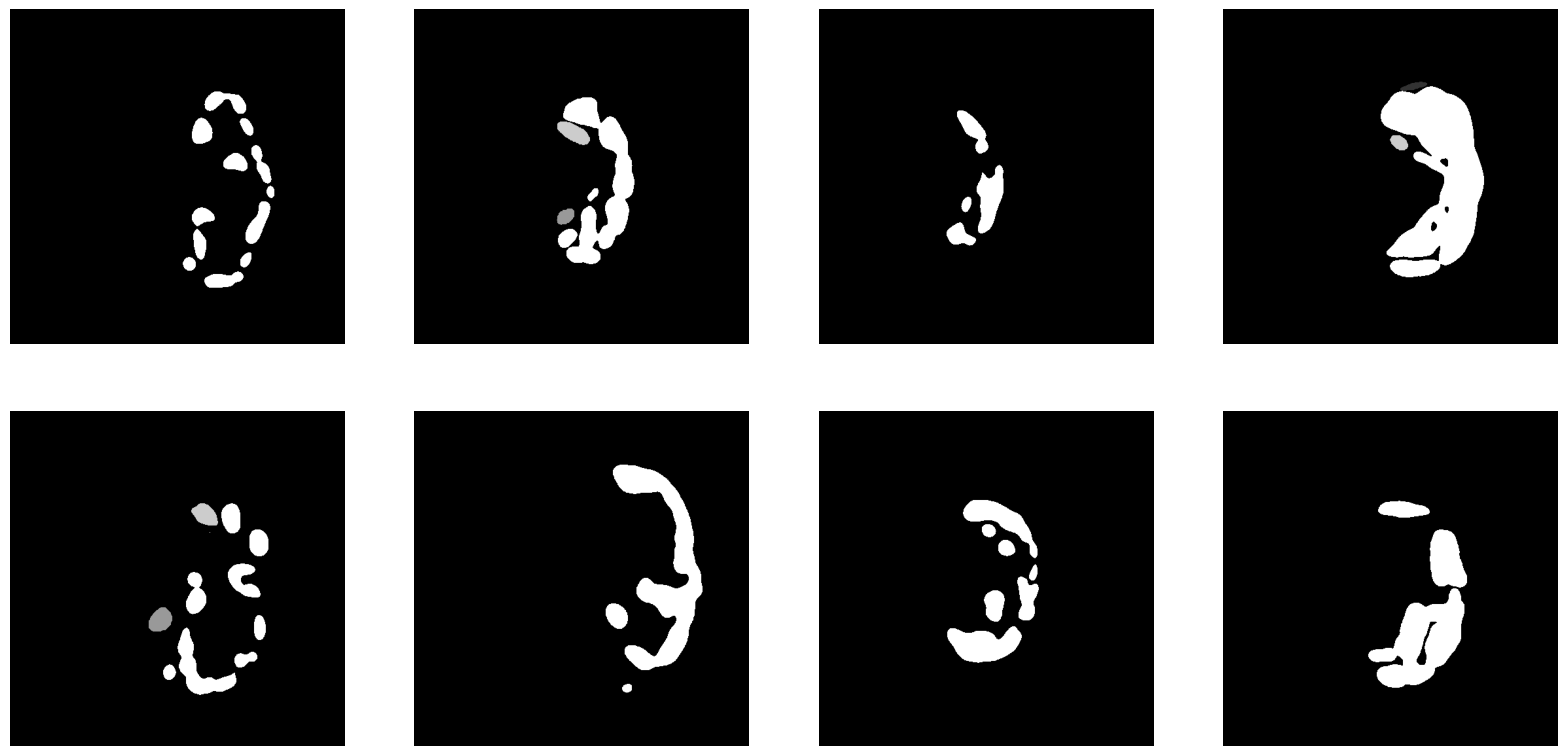

In [13]:
seg_image_file = glob("/kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations/*.nii")

plt.figure(figsize=(20, 20))

for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    image_path = seg_image_file[i]
    nii_img = nib.load(image_path).get_fdata()
    nib_image = nii_img[:,:,nii_img.shape[2]//2]
    
    plt.axis('off')
    plt.imshow(nib_image,cmap='gray')

In [15]:
id = 21057 #input series_id

In [16]:
patient_id = df[df['series_id'] == id]['patient_id'].iloc[0]
patient_id

10004

In [17]:
seg_filepath = f'{PATH}/segmentations/{id}.nii'
img_filepath = f'{PATH}/train_images/{patient_id}/{id}'

print("Segmentation File Path:", seg_filepath)
print("Image File Path:", img_filepath)

Segmentation File Path: /kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations/21057.nii
Image File Path: /kaggle/input/rsna-2023-abdominal-trauma-detection/train_images/10004/21057


In [18]:
def create_3D_scans(folder, downsample_rate=1):
    
    #reads the filenames in the folder, extracts the IDs from the filenames, sorts them, and constructs a list of filenames to read in order.
    filenames = os.listdir(folder)
    filenames = [int(filename.split('.')[0]) for filename in filenames]
    filenames = sorted(filenames)
    filenames = [str(filename) + '.dcm' for filename in filenames]
        
    volume = []
    for filename in filenames[::downsample_rate]:
        filepath = os.path.join(folder, filename)
        ds = pydicom.dcmread(filepath)
        #This extracts the pixel array data from the DICOM object. The pixel array represents the 2D image slice
        image = ds.pixel_array
        
        # find rescale params
        if ("RescaleIntercept" in ds) and ("RescaleSlope" in ds):
            intercept = float(ds.RescaleIntercept)
            slope = float(ds.RescaleSlope)
    
        # find clipping params
        center = int(ds.WindowCenter)
        width = int(ds.WindowWidth)
        low = center - width / 2
        high = center + width / 2    
        image = (image * slope) + intercept
        image = np.clip(image, low, high)

        image = (image / np.max(image) * 255).astype(np.int16)#Normalize the pixel values to a range between 0 and 255 and convert them to 16-bit integers. This step is usually done for visualization purpose
        image = image[::downsample_rate, ::downsample_rate]
        volume.append( image )
    
    volume = np.stack(volume, axis=0)
    return volume

In [19]:
def create_3D_segmentations(filepath, downsample_rate=1):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, [2, 1, 0])
    img = np.rot90(img, -1, (1,2))
    img = img[::-1,:,:]
    img = np.transpose(img, [2, 1, 0])
    img = img[::downsample_rate, ::downsample_rate, ::downsample_rate]
    return img

In [34]:
def segmentation_visualization(patient_id, series_id, idx):
    
    PATH = '/kaggle/input/rsna-2023-abdominal-trauma-detection'
    seg_filepath = f'{PATH}/segmentations/{series_id[idx]}.nii'
    img_filepath = f'{PATH}/train_images/{patient_id[idx]}/{series_id[idx]}'
    
    a = glob(f'{PATH}/segmentations/*.nii')

    if f'{PATH}/segmentations/{series_id[idx]}.nii' in a:
        print('The series id exists')
    else:
        print('The series id does not exist')
    
    volume = create_3D_scans(img_filepath)
    volume = volume.transpose(1, 2, 0)
    
    volume_seg = create_3D_segmentations(seg_filepath)
    
    fig = plt.figure(figsize=(16,16))

    ax1 = fig.add_subplot(131)
    ax1.imshow(volume[:,:,volume.shape[2]//2], cmap = 'gray')
    ax1.set_title('Original Image', fontsize=14)

    ax2 = fig.add_subplot(132)
    ax2.imshow(volume_seg[:,:,volume_seg.shape[2]//2], cmap = 'gray')
    ax2.set_title('Segmented Image', fontsize=14)

    ax3 = fig.add_subplot(133)
    ax3.imshow(volume[:,:,volume.shape[2]//2]*np.where(volume_seg[:,:,volume_seg.shape[2]//2]>0,1,0), cmap = 'gray')
    ax3.set_title('Overlay of Original and Segmented', fontsize=14)
    plt.show()

The series id exists


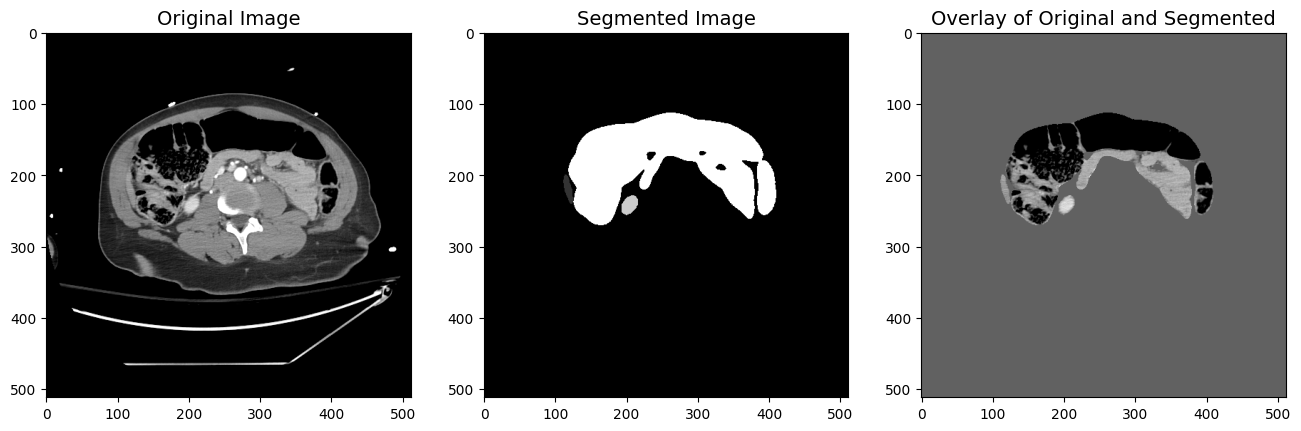

In [36]:
segmentation_visualization(patients_segment["patient_id"], patients_segment["series_id"], idx=176)